<a href="https://colab.research.google.com/github/phongidoit/Machine-learning-but-from-ground-up/blob/main/Logistic_Regression%20(Heart%20dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
path='/content/drive/MyDrive/heart.csv'
import pandas as pd
file= pd.read_csv(path)

y=file.pop('target')
print(file.shape)
print(y.value_counts())


(1025, 13)
1    526
0    499
Name: target, dtype: int64


In [47]:
file.info()
#result show no missing data, good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


In [69]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(x):
    return round(1/(1+np.exp(-x)),4)

def predict(w,single_data):
    temp=0
    for i in range(len(w)-1):
        temp+= w[i]* single_data[i]
    temp+=w[13]
    p=sigmoid(temp)
    return p

def min_max_scale(dataset):
  for i in range(len(dataset.T)):
    z=np.zeros(len(dataset.T))
    min_x,max_x=min(dataset.T[i]),max(dataset.T[i])
    for j in range(len(dataset.T[i])):
       dataset.T[i][j] = float(( dataset.T[i][j] - min_x) /( max_x - min_x) )
  
                   
def gradient_descent(w,p,y,lr,x):
    for i in range(len(p)):
        for j in range(len(w)-1):
            w[j]-=(p[i]-y[i])*x[i][j]*lr
        w[13] -= (p[i]-y[i])*lr 
    return w    

def Loss_cal(p,y):
    Loss=0
    for i in range(len(y)):
        Loss += y[i] * math.log( p[i] ) + (1 - y[i]) * math.log( 1 - p[i])
    return round(Loss/len(y),4)    

def Confusion_matrix(result):
    print("\n--Confusion matrix--\n\t\t Actual Value \n\t\t Positive \t Negative ")
    print("Pred Positve\t",result[1],'\t\t',result[3])
    print("Pred Negative\t",result[4],'\t\t',result[2])

def Visualized_matrix(result):
  plt.figure(figsize=(7,5))
  sns.set(font_scale=0.9)
  res=[ [result[1],result[3]] , [result[4],result[2]] ]
  ax=sns.heatmap(res,annot=True, annot_kws={"size": 13},fmt='g',
  xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative']) 
  ax.set(xlabel='True Value',ylabel='Predict value')   

def bias_barplot(y):
  plt.figure(figsize=(4,5))
  ax=sns.barplot( x=[0,1],y=[np.count_nonzero(y==0),np.count_nonzero(y==1)])

def Training(x_train,y_train):
  w=np.ones(14)
  lr=0.002
  step,max_step=0,6000
  for step in range(max_step):
    p=[]
    for record in x_train:
      p.append(predict(w,record))
    w=gradient_descent(w,p,y_train,lr,x_train)
    if (step%500==0):
      print('step',step,"Avg Loss",Loss_cal(p,y_train))
  return w

def evaluation(p,y):
    #True+, True-, False+, False-
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(y)):
        if round(p[i])==y[i]:
            if y[i]==1:
                tp+=1
            else:
                tn+=1
        else:
            if round(p[i])==0:
                fn+=1
            else:
                fp+=1
    return round( (tp+tn)/ (tp+tn+fn+fp),5),tp,tn,fp,fn       


step 0 Avg Loss -1.6476
step 500 Avg Loss -0.3657
step 1000 Avg Loss -0.3637
step 1500 Avg Loss -0.3634
step 2000 Avg Loss -0.3633
step 2500 Avg Loss -0.3633
step 3000 Avg Loss -0.3633
step 3500 Avg Loss -0.3633
step 4000 Avg Loss -0.3633
step 4500 Avg Loss -0.3633
step 5000 Avg Loss -0.3633
step 5500 Avg Loss -0.3633
[-0.75117955 -1.91420025  2.40327889 -1.63007404 -2.33869407  0.09742833
  0.96505315  2.82818153 -1.06379009 -3.61467209  0.78389879 -2.77499806
 -2.83399091  3.25373174]
Number of appearance: 0: 354 	1: 363


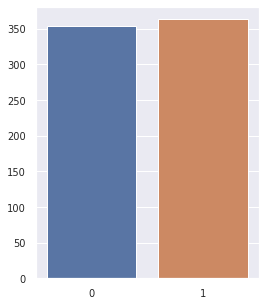

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(file,y,test_size=0.3,random_state=0)
y_train.value_counts()
#363 for positive value, 354 for negative value

#switch to numpy for easier handling

combine=[X_train,X_val,y_train,y_val]
X_train,X_val,y_train,y_val=[dts.to_numpy() for dts in combine]


min_max_scale(X_train)

#training    
w=Training(X_train,y_train)
print(w)  

print('Number of appearance: 0:',np.count_nonzero(y_train==0),'\t1:',np.count_nonzero(y_train==1))
bias_barplot(y_train)
#normalized

accuracy: 0.86688
Avg Loss: -0.326
----------
CONFUSION MATRIX


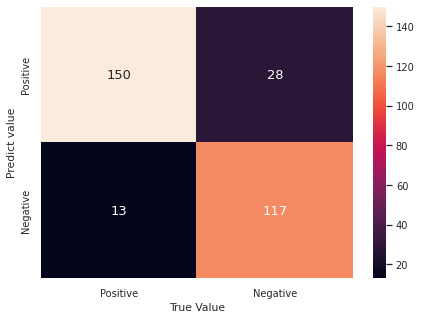

In [68]:
#normalized test value
min_max_scale(X_val)

p_val=np.zeros(len(y_val))
#predict on validtion data
for i in range(len(y_val)):
    p_val[i]=predict(w,X_val[i])

#result of prediction
result=evaluation(p_val,y_val)    

print('accuracy:',result[0])
print('Avg Loss:',Loss_cal(p_val,y_val))
print('-'*10)
print('CONFUSION MATRIX')
Visualized_matrix(result)

#result tp:150, tn: 117, Fp: 28, Fn: 13

The task is to use only 1/3 of the '0' in the training dataset to see how the bias affect the result.

Before deleted
Number of appearance: 0: 354 	1: 363
After deleted
Number of appearance: 0: 113 	1: 363


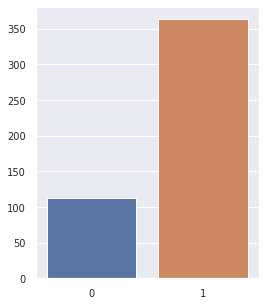

In [51]:
#random pick the value n drop em
from random import random
#reset the training set, random_state is use so it should stay the same
X_train,X_val,y_train,y_val=train_test_split(file,y,test_size=0.3,random_state=0) 

#to numpy for easier calculation
combine=[X_train,X_val,y_train,y_val]
X_train,X_val,y_train,y_val=[dts.to_numpy() for dts in combine]

to_drop=[]
for i,value in enumerate(y_train):
    if value==0 and random()>0.3:
        to_drop.append(i)

#Before and After deleting      
print('Before deleted\nNumber of appearance: 0:',np.count_nonzero(y_train==0),'\t1:',np.count_nonzero(y_train==1))        
y_train=np.delete(y_train,to_drop,axis=0)      
X_train=np.delete(X_train,to_drop,axis=0)   
print('After deleted\nNumber of appearance: 0:',np.count_nonzero(y_train==0),'\t1:',np.count_nonzero(y_train==1))

bias_barplot(y_train)


step 0 Avg Loss -1.5642
step 500 Avg Loss -0.3183
step 1000 Avg Loss -0.3159
step 1500 Avg Loss -0.3155
step 2000 Avg Loss -0.3154
step 2500 Avg Loss -0.3153
step 3000 Avg Loss -0.3153
step 3500 Avg Loss -0.3153
step 4000 Avg Loss -0.3153
step 4500 Avg Loss -0.3153
step 5000 Avg Loss -0.3153
step 5500 Avg Loss -0.3153
step 6000 Avg Loss -0.3153
step 6500 Avg Loss -0.3153
accuracy: 0.82468
Avg Loss: -0.3778
----------
CONFUSION MATRIX


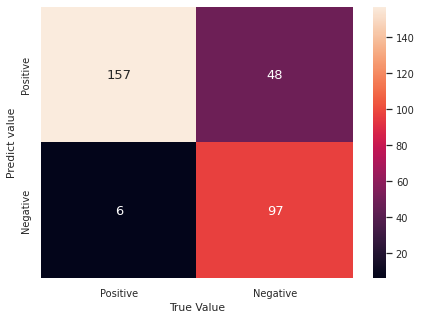

In [52]:
#normalized
min_max_scale( X_train )

#training    
w=Training(X_train,y_train)

#normalize the val 
min_max_scale( X_val )

p_val=np.zeros(len(y_val))
#predict on validtion data
for i in range(len(y_val)):
    p_val[i]=predict(w,X_val[i])

#result of prediction
result=evaluation(p_val,y_val)  

#result of prediction
print('accuracy:',result[0])
print('Avg Loss:',Loss_cal(p_val,y_val))
print('-'*10)
print('CONFUSION MATRIX')
Visualized_matrix(result)

#result tp:156, tn: 95, FP: 50, Fn: 7

Seeing that there is now some bias in the result, the solution is to dulicate what remaining of the '0' value to counter-balance

Before added
Number of appearance: 0: 113 	1: 363
After added
Number of appearance: 0: 339 	1: 363


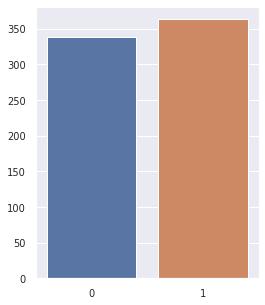

In [53]:
#reset the dataset to prevent any problem
X_train,X_val,y_train,y_val=train_test_split(file,y,test_size=0.3,random_state=0) 

#to numpy for easier calculation
combine=[X_train,X_val,y_train,y_val]
X_train,X_val,y_train,y_val=[dts.to_numpy() for dts in combine]

#delete the said element
y_train=np.delete(y_train,to_drop,axis=0)      
X_train=np.delete(X_train,to_drop,axis=0)

print('Before added\nNumber of appearance: 0:',np.count_nonzero(y_train==0),'\t1:',np.count_nonzero(y_train==1))

#duplicate
u=len(y_train)
for i in range(u):
  if y_train[i]==0:
    for j in range(2):
      y_train=np.append(y_train,[ y_train[i] ])
      X_train=np.append(X_train,[ X_train[i] ],axis=0)
print('After added\nNumber of appearance: 0:',np.count_nonzero(y_train==0),'\t1:',np.count_nonzero(y_train==1))
bias_barplot(y_train)


step 0 Avg Loss -3.1778
step 500 Avg Loss -0.3977
step 1000 Avg Loss -0.3968
step 1500 Avg Loss -0.3967
step 2000 Avg Loss -0.3967
step 2500 Avg Loss -0.3967
step 3000 Avg Loss -0.3967
step 3500 Avg Loss -0.3967
step 4000 Avg Loss -0.3967
step 4500 Avg Loss -0.3967
step 5000 Avg Loss -0.3967
step 5500 Avg Loss -0.3967
step 6000 Avg Loss -0.3967
step 6500 Avg Loss -0.3967
accuracy: 0.8474
Avg Loss: -0.3303
----------
CONFUSION MATRIX


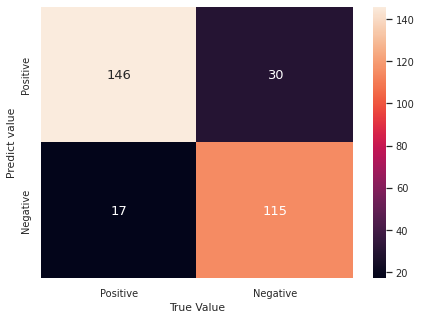

In [54]:
min_max_scale( X_train )

#model
w=Training(X_train,y_train)

#normalize the val 
min_max_scale( X_val )

p_val=np.zeros(len(y_val))
#predict on validtion data
for i in range(len(y_val)):
    p_val[i]=predict(w,X_val[i])

#result of prediction
result=evaluation(p_val,y_val)      

#result of prediction
print('accuracy:',result[0])
print('Avg Loss:',Loss_cal(p_val,y_val))
print('-'*10)
print('CONFUSION MATRIX')
Visualized_matrix(result)

#result tp:150, tn: 117, Fp: 28, Fn: 13

Number of appearance: 0: 145 	1: 163


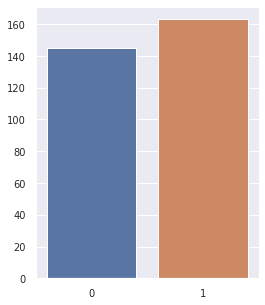

In [56]:
print('Number of appearance: 0:',np.count_nonzero(y_val==0),'\t1:',np.count_nonzero(y_val==1))
bias_barplot(y_val)